In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [144]:
data = pd.read_csv(r'D:\first_project\customer_data.csv')

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       5000 non-null   object 
 1   age               5000 non-null   int64  
 2   gender            5000 non-null   object 
 3   location          5000 non-null   object 
 4   signup_date       5000 non-null   object 
 5   total_orders      5000 non-null   int64  
 6   avg_order_value   5000 non-null   float64
 7   email_subscribed  5000 non-null   bool   
 8   loyalty_tier      5000 non-null   object 
 9   lifetime_value    5000 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 356.6+ KB


In [146]:
data.describe()

,age,total_orders,avg_order_value,lifetime_value
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.602400,9.990000,279.924528,2802.653922
std,14.894384,5.514452,130.270029,2158.597933
min,18.000000,1.000000,50.020000,51.240000
25%,31.000000,5.000000,168.952500,1032.502500
50%,43.000000,10.000000,280.355000,2253.380000
75%,57.000000,15.000000,392.255000,4106.100000
max,69.000000,19.000000,499.960000,9497.150000


In [147]:
data.shape

(5000, 10)

In [148]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

customer_id         0
age                 0
gender              0
location            0
signup_date         0
total_orders        0
avg_order_value     0
email_subscribed    0
loyalty_tier        0
lifetime_value      0
dtype: int64


In [149]:
data.head()

,customer_id,age,gender,location,signup_date,total_orders,avg_order_value,email_subscribed,loyalty_tier,lifetime_value
0,CUST0001,23,F,CA,2023-09-05,4,210.30,True,Bronze,841.20
1,CUST0002,41,M,NY,2023-10-22,12,270.97,False,Bronze,3251.64
2,CUST0003,50,Other,CA,2023-11-23,8,464.84,True,Bronze,3718.72
3,CUST0004,66,M,FL,2023-06-07,15,266.24,True,Bronze,3993.60
4,CUST0005,46,F,CA,2023-01-01,19,56.29,True,Bronze,1069.51


In [150]:
numerical_columns=data.select_dtypes(include=["int","float"])
numerical_columns.columns

Index(['age', 'total_orders', 'avg_order_value', 'lifetime_value'], dtype='object')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'total_orders'}>],
       [<Axes: title={'center': 'avg_order_value'}>,
        <Axes: title={'center': 'lifetime_value'}>]], dtype=object)

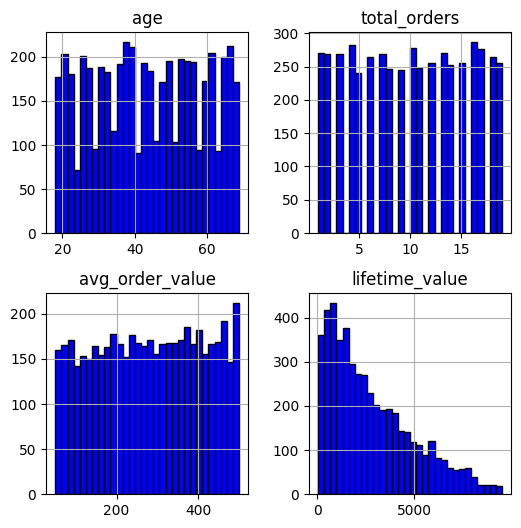

In [151]:
#distribution of of numerical columns
numerical_columns.hist(figsize=(6,6),bins=30,color='blue',edgecolor='black')

In [152]:
catagorical_columns = data.select_dtypes(include=["object", "bool"]).columns

In [153]:
catagorical_columns

Index(['customer_id', 'gender', 'location', 'signup_date', 'email_subscribed',
       'loyalty_tier'],
      dtype='object')

In [154]:
coustmer_id_count= data['customer_id'].value_counts().reset_index()

coustmer_id_count

,customer_id,count
0,CUST5000,1
1,CUST0001,1
2,CUST0002,1
3,CUST0003,1
4,CUST0004,1
...,...,...
4995,CUST0012,1
4996,CUST0013,1
4997,CUST0014,1
4998,CUST0015,1


In [155]:
location_count=data.value_counts("location").reset_index()
location_count

,location,count
0,IL,1041
1,FL,1008
2,CA,994
3,NY,990
4,TX,967


<Axes: xlabel='location', ylabel='count'>

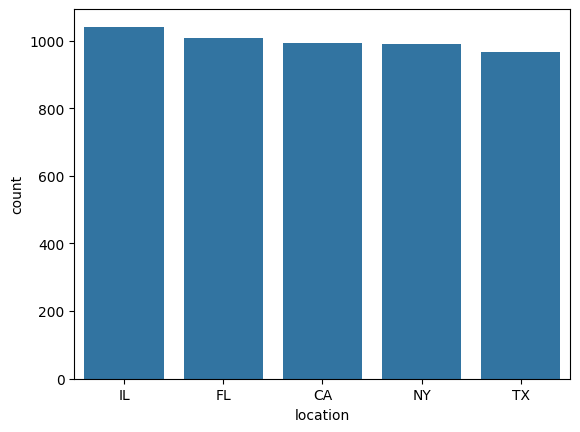

In [156]:
sns.barplot(x='location',y='count',data=location_count)

In [157]:
gender_count=data.value_counts("gender").reset_index()
gender_count

,gender,count
0,F,1716
1,Other,1644
2,M,1640


<Axes: xlabel='gender', ylabel='count'>

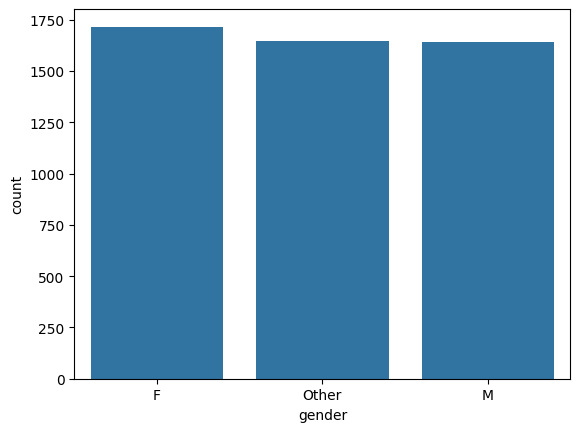

In [158]:
sns.barplot(x='gender',y='count',data=gender_count)

In [159]:
email_subscribed_count=data.value_counts("email_subscribed")
email_subscribed_count

email_subscribed
True     3587
False    1413
Name: count, dtype: int64

In [160]:
loyalty_tier_count=data.value_counts("loyalty_tier")
loyalty_tier_count

loyalty_tier
Bronze    2993
Silver    1507
Gold       500
Name: count, dtype: int64

In [161]:
#Male from CA having broze card
filtered_customers = data[
    (data["gender"] == "M") & 
    (data["location"] == "CA") & 
    (data["loyalty_tier"] == "Bronze")
]

print("Male customers from CA with Bronze card:")
print(filtered_customers)


Male customers from CA with Bronze card:
     customer_id  age gender location signup_date  total_orders  \
31      CUST0032   47      M       CA  2023-09-10             7   
37      CUST0038   33      M       CA  2023-04-24            14   
74      CUST0075   20      M       CA  2023-08-31             1   
100     CUST0101   48      M       CA  2023-04-14            17   
144     CUST0145   49      M       CA  2023-09-25             3   
...          ...  ...    ...      ...         ...           ...   
4918    CUST4919   56      M       CA  2023-11-23            10   
4933    CUST4934   40      M       CA  2023-03-15             7   
4934    CUST4935   22      M       CA  2023-05-22             1   
4961    CUST4962   21      M       CA  2023-09-18            15   
4969    CUST4970   23      M       CA  2023-11-24             3   

      avg_order_value  email_subscribed loyalty_tier  lifetime_value  
31             464.83              True       Bronze         3253.81  
37          

<function matplotlib.pyplot.show(close=None, block=None)>

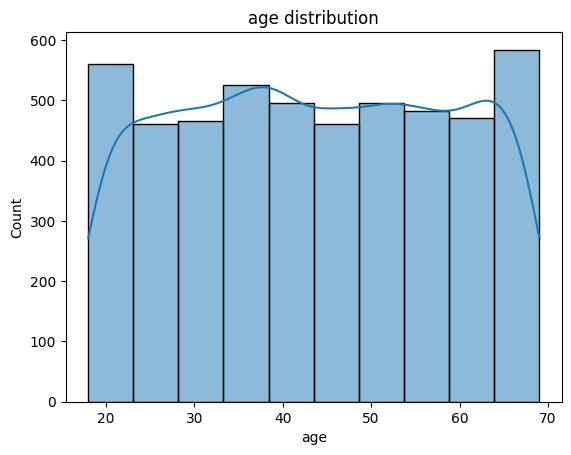

In [162]:
# Histogram for numerical distribution
sns.histplot (data["age"], kde=True, bins=10)
plt.title("age distribution")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

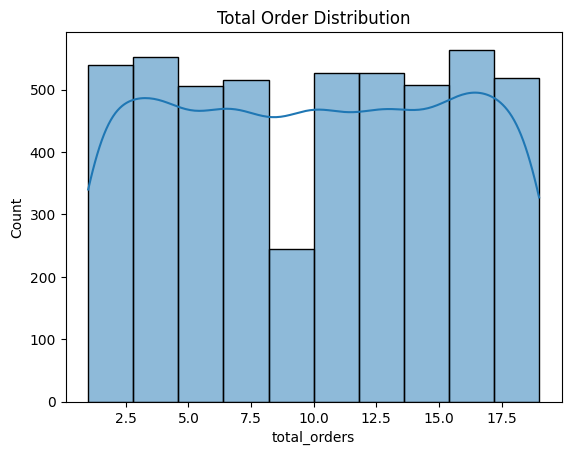

In [163]:
# Histogram for numerical distribution
sns.histplot (data["total_orders"], kde=True, bins=10)
plt.title("Total Order Distribution")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

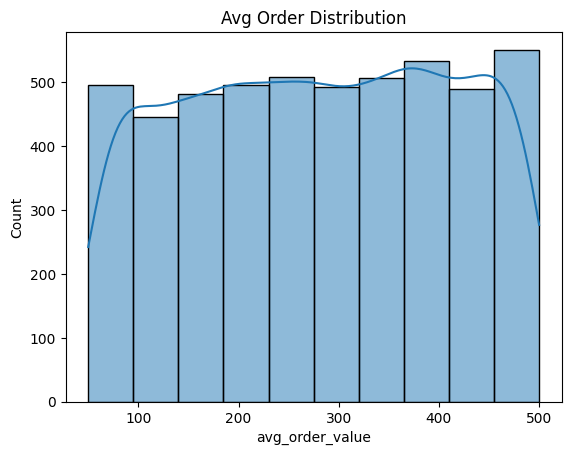

In [164]:
# Histogram for numerical distribution
sns.histplot (data["avg_order_value"], kde=True, bins=10)
plt.title("Avg Order Distribution")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

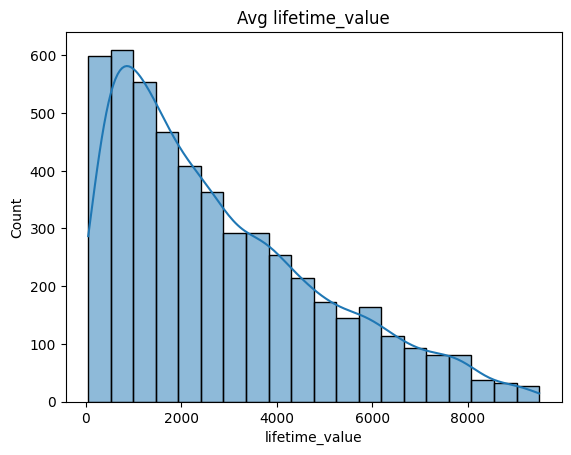

In [165]:
# Histogram for numerical distribution
sns.histplot (data["lifetime_value"], kde=True, bins=20)
plt.title("Avg lifetime_value")
plt.show

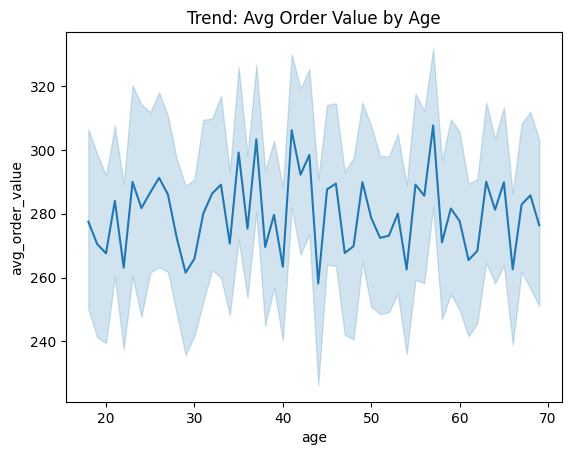

In [166]:
 #Line plot for trends (e.g., order values over age)
sns.lineplot(x="age", y="avg_order_value", data=data)
plt.title("Trend: Avg Order Value by Age")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

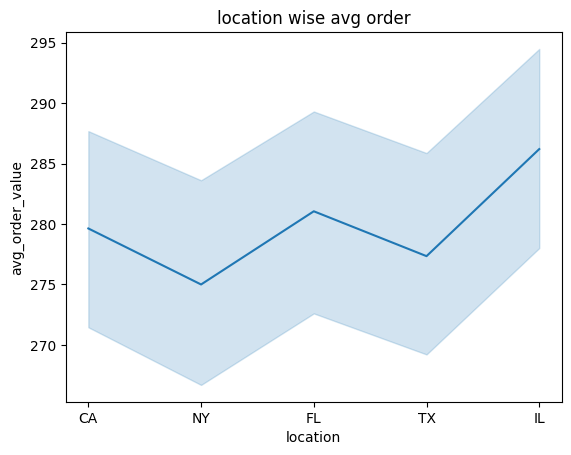

In [167]:
sns.lineplot(x="location",y="avg_order_value", data=data)
plt.title( "location wise avg order")
plt.show


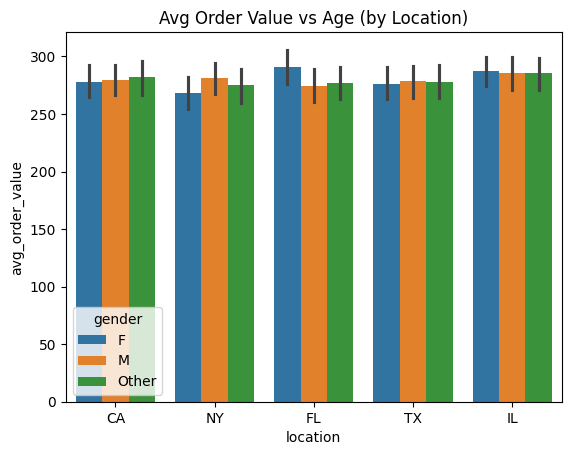

In [168]:
# Scatterplot for relationships
sns.barplot(x="location", y="avg_order_value", hue="gender", data=data)
plt.title("Avg Order Value vs Age (by Location)")
plt.show()

In [169]:
location_totalorders = data.groupby(['location','gender'])["lifetime_value"].sum().reset_index()
location_totalorders

,location,gender,lifetime_value
0,CA,F,978055.58
1,CA,M,816375.31
2,CA,Other,933525.20
3,FL,F,1021672.68
4,FL,M,912334.28
5,FL,Other,940134.72
6,IL,F,1110731.02
7,IL,M,946537.41
8,IL,Other,963513.02
9,NY,F,828939.54


<Axes: xlabel='location', ylabel='lifetime_value'>

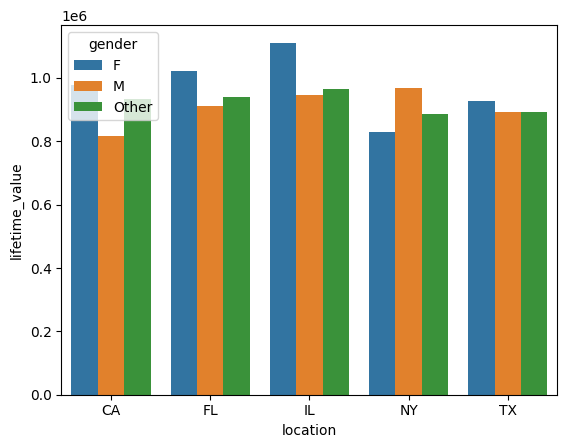

In [170]:
sns.barplot(x='location',y='lifetime_value',hue='gender',data=location_totalorders)

In [171]:
groupd_data=data.groupby(["location","loyalty_tier"])["total_orders"].sum().reset_index()
print(groupd_data)

   location loyalty_tier  total_orders
0        CA       Bronze          5952
1        CA         Gold           889
2        CA       Silver          2934
3        FL       Bronze          5952
4        FL         Gold          1207
5        FL       Silver          3053
6        IL       Bronze          6200
7        IL         Gold           971
8        IL       Silver          3269
9        NY       Bronze          5853
10       NY         Gold          1123
11       NY       Silver          2808
12       TX       Bronze          6075
13       TX         Gold           914
14       TX       Silver          2750


<Axes: xlabel='location', ylabel='total_orders'>

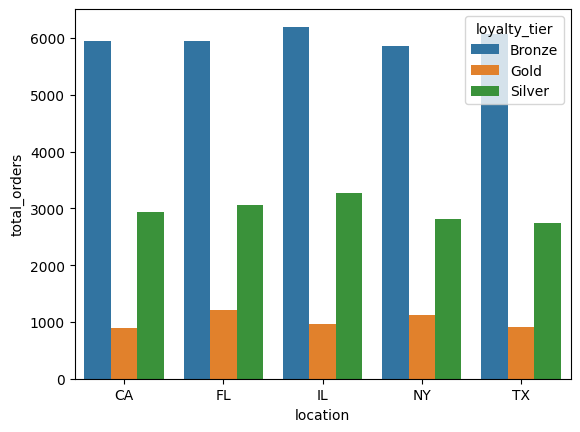

In [172]:
sns.barplot(x='location',y='total_orders',hue='loyalty_tier',data=groupd_data)

In [173]:

#Convert signup_date to Datetime: Ensure the signup_date column is in datetime format.
data["signup_date"]=pd.to_datetime(data["signup_date"])

In [174]:
#exterct month from date 
data['signup_month'] = data['signup_date'].dt.to_period('M')

In [175]:
monthly_ltv = data.groupby(['signup_month','gender'])['lifetime_value'].sum().reset_index()
monthly_ltv

,signup_month,gender,lifetime_value
0,2023-01,F,380528.52
1,2023-01,M,373081.86
2,2023-01,Other,397430.10
3,2023-02,F,396736.87
4,2023-02,M,270184.35
5,2023-02,Other,353539.38
6,2023-03,F,418691.55
7,2023-03,M,361089.82
8,2023-03,Other,443495.84
9,2023-04,F,321428.02


In [176]:
city_month_ltv = data.groupby(['signup_month', 'location'])['lifetime_value'].sum().reset_index()
pivot_table=city_month_ltv.pivot(index='signup_month', columns='location', values='lifetime_value')
print(pivot_table)

location             CA         FL         IL         NY         TX
signup_month                                                       
2023-01       216594.49  205793.52  309618.85  161353.61  257680.01
2023-02       187170.89  270441.77  226562.43  173924.02  162361.49
2023-03       221744.05  256500.50  242767.22  287181.58  215083.86
2023-04       135613.98  247286.87  253893.53  202904.57  215514.87
2023-05       268859.60  279916.76  280892.63  241128.66  274870.66
2023-06       277761.50  254063.65  180120.26  219822.82  196321.79
2023-07       234845.80  254512.16  304710.42  216836.44  211300.83
2023-08       244736.66  228369.30  221497.02  282796.69  257125.51
2023-09       253578.84  184696.49  256456.62  233974.84  210767.53
2023-10       236390.29  223113.44  270752.80  239128.01  257098.34
2023-11       229935.46  221885.62  262147.13  192370.85  241808.60
2023-12       220724.53  247561.60  211362.54  230325.15  208709.66


In [177]:
city_month_ltv = data.groupby(['signup_month', 'location'])['avg_order_value'].sum().reset_index()
pivot_table=city_month_ltv.pivot(index='signup_month', columns='location', values='avg_order_value')
print(pivot_table)

location            CA        FL        IL        NY        TX
signup_month                                                  
2023-01       21443.00  20759.39  31628.07  17054.81  24262.84
2023-02       19738.97  24969.43  21756.15  19519.17  18073.83
2023-03       22347.80  24553.14  23512.39  28202.06  21964.76
2023-04       14702.91  24538.94  25619.68  23198.84  20612.88
2023-05       26225.54  23473.40  28414.22  23344.35  25967.02
2023-06       26661.16  25112.72  18831.69  21277.23  18751.77
2023-07       24224.72  27452.39  29828.93  22456.39  21101.33
2023-08       24392.18  26134.81  19265.05  27777.31  22422.27
2023-09       25968.95  17556.41  25236.03  22110.56  23130.85
2023-10       27501.56  23259.82  26693.72  24952.46  27544.54
2023-11       22717.26  21718.21  25933.59  21106.90  22630.98
2023-12       22029.20  23771.95  21214.22  21246.52  21725.37


In [178]:
city_month_ltv = data.groupby(['signup_month', 'location'])['total_orders'].sum().reset_index()
pivot_table=city_month_ltv.pivot(index='signup_month', columns='location', values='total_orders')
print(pivot_table)

location        CA   FL    IL    NY   TX
signup_month                            
2023-01        836  752  1017   637  904
2023-02        643  899   704   607  573
2023-03        858  916   956   975  831
2023-04        585  914   919   753  809
2023-05        881  966   921   945  946
2023-06       1023  911   668   775  675
2023-07        803  767   987   765  782
2023-08        867  866   750  1093  893
2023-09        848  682   939   828  813
2023-10        807  850   898   784  884
2023-11        823  821   961   728  868
2023-12        801  868   720   894  761


In [179]:
def categorize_age(age):
    if age <= 18:
        return "0-18"
    elif age <= 25:
        return "19-25"
    elif age <= 35:
        return "26-35"
    elif age <= 45:
        return "36-45"
    elif age <= 60:
        return "46-60"
    else:
        return "60+"

# Apply function to create age groups
data['age_group'] = data['age'].apply(categorize_age)

data['age_group'].value_counts()

age_group
46-60    1428
36-45     994
26-35     955
60+       881
19-25     653
0-18       89
Name: count, dtype: int64

In [180]:
age_group_location=data.groupby(['signup_month','age_group','location'])['lifetime_value'].sum().reset_index()
age_group_location_sorted = age_group_location.sort_values(by="location")
age_group_location_sorted

,signup_month,age_group,location,lifetime_value
0,2023-01,0-18,CA,1940.32
201,2023-08,0-18,CA,4137.60
73,2023-03,36-45,CA,45313.09
206,2023-08,19-25,CA,15844.77
211,2023-08,26-35,CA,48816.76
...,...,...,...,...
67,2023-03,19-25,TX,19175.90
210,2023-08,19-25,TX,34944.94
205,2023-08,0-18,TX,3247.45
292,2023-11,0-18,TX,3411.30


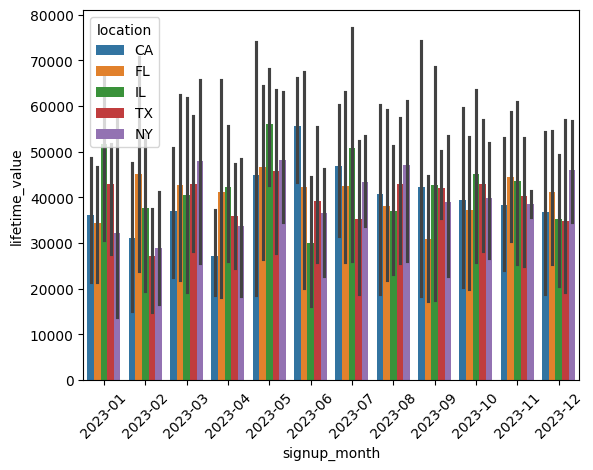

In [181]:
sns.barplot(x='signup_month',y='lifetime_value',hue='location',data=age_group_location)
plt.xticks(rotation=45) 
plt.show()

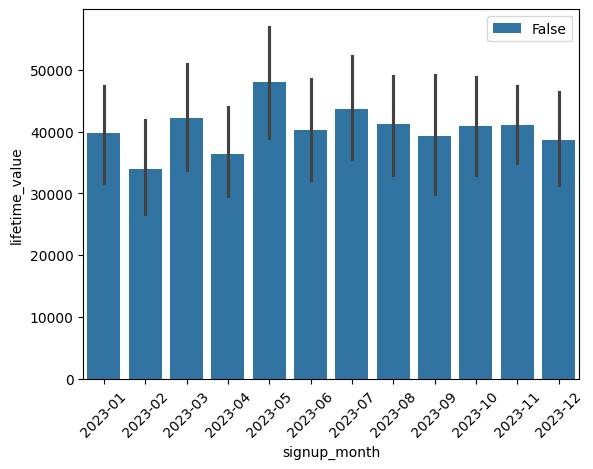

In [182]:
sns.barplot(x='signup_month',y='lifetime_value',hue=('location'=='IL'),data=age_group_location)
plt.xticks(rotation=45) 
plt.show()

In [183]:
#monthly signup group by agegroup
age_group_signupmonth=data.groupby(['signup_month','age_group'
                                 ])['lifetime_value'].sum().reset_index()

age_group_signupmonth.sort_values(by="age_group")

,signup_month,age_group,lifetime_value
0,2023-01,0-18,15424.52
54,2023-10,0-18,39807.40
48,2023-09,0-18,11954.60
42,2023-08,0-18,27883.71
36,2023-07,0-18,30815.33
...,...,...,...
17,2023-03,60+,201676.36
11,2023-02,60+,156339.93
5,2023-01,60+,204387.67
59,2023-10,60+,197597.52


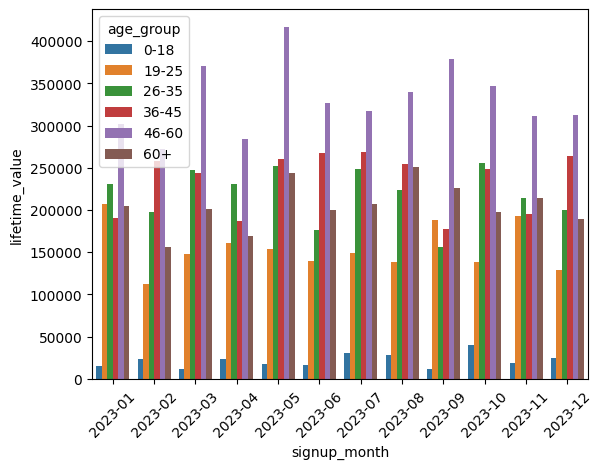

In [184]:
#monthly age group lifetime value
sns.barplot(x='signup_month',y='lifetime_value',hue='age_group',data=age_group_signupmonth)
plt.xticks(rotation=45) 
plt.show()

In [185]:
#monthly signup group by agegroup
age_group_signupmonth_avgordervalue=data.groupby(['signup_month','age_group'
                                 ])['avg_order_value'].sum().reset_index()

age_group_signupmonth_avgordervalue.sort_values(by="age_group")

,signup_month,age_group,avg_order_value
0,2023-01,0-18,1840.86
54,2023-10,0-18,3382.46
48,2023-09,0-18,1299.27
42,2023-08,0-18,2725.60
36,2023-07,0-18,3483.94
...,...,...,...
17,2023-03,60+,20617.34
11,2023-02,60+,15799.50
5,2023-01,60+,21591.73
59,2023-10,60+,19363.68


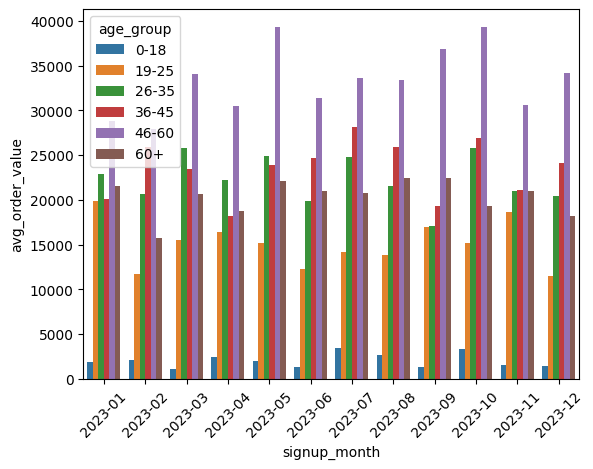

In [186]:
#monthly age group avg order plot
sns.barplot(x='signup_month',y='avg_order_value',hue='age_group',data=age_group_signupmonth_avgordervalue)
plt.xticks(rotation=45) 
plt.show()

In [187]:
monthly_totalorers=data.groupby(['signup_month','gender'])['total_orders'].sum().reset_index()
                                
monthly_totalorers

,signup_month,gender,total_orders
0,2023-01,F,1389
1,2023-01,M,1358
2,2023-01,Other,1399
3,2023-02,F,1288
4,2023-02,M,927
5,2023-02,Other,1211
6,2023-03,F,1553
7,2023-03,M,1422
8,2023-03,Other,1561
9,2023-04,F,1171


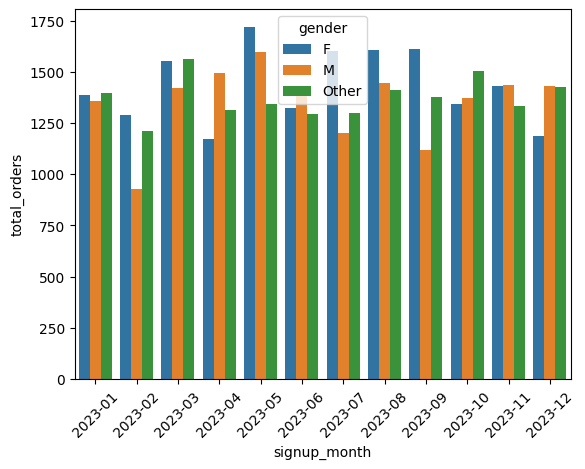

In [188]:
sns.barplot(x='signup_month',y='total_orders',hue='gender',data=monthly_totalorers)
plt.xticks(rotation=45) 
plt.show()

In [189]:
monthly_location_totalorers=data.groupby(['location','gender'])['total_orders'].sum().reset_index()
                                
monthly_location_totalorers

,location,gender,total_orders
0,CA,F,3546
1,CA,M,2905
2,CA,Other,3324
3,FL,F,3484
4,FL,M,3331
5,FL,Other,3397
6,IL,F,3799
7,IL,M,3286
8,IL,Other,3355
9,NY,F,3086


<Axes: xlabel='location', ylabel='total_orders'>

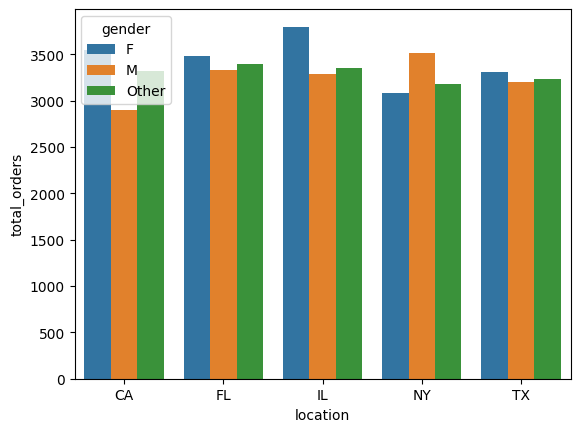

In [190]:
sns.barplot(x='location',y='total_orders',hue='gender',data=                                
monthly_location_totalorers)

In [191]:
# Preprocessing & Normalizationfrom 
from sklearn.preprocessing import StandardScaler
# Selecting relevant features
features = ['age', 'total_orders', 'avg_order_value', 'lifetime_value']
data_cluster = data[features].copy()
data_cluster

,age,total_orders,avg_order_value,lifetime_value
0,23,4,210.30,841.20
1,41,12,270.97,3251.64
2,50,8,464.84,3718.72
3,66,15,266.24,3993.60
4,46,19,56.29,1069.51
...,...,...,...,...
4995,69,4,224.62,898.48
4996,40,2,323.06,646.12
4997,47,3,345.63,1036.89
4998,42,7,310.19,2171.33


In [192]:
data_cluster.describe()

,age,total_orders,avg_order_value,lifetime_value
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.602400,9.990000,279.924528,2802.653922
std,14.894384,5.514452,130.270029,2158.597933
min,18.000000,1.000000,50.020000,51.240000
25%,31.000000,5.000000,168.952500,1032.502500
50%,43.000000,10.000000,280.355000,2253.380000
75%,57.000000,15.000000,392.255000,4106.100000
max,69.000000,19.000000,499.960000,9497.150000


# Normalize the data (important for clustering)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cluster)


In [193]:
# Normalize the data (important for clustering)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cluster)


In [194]:
#Check Feature Correlation

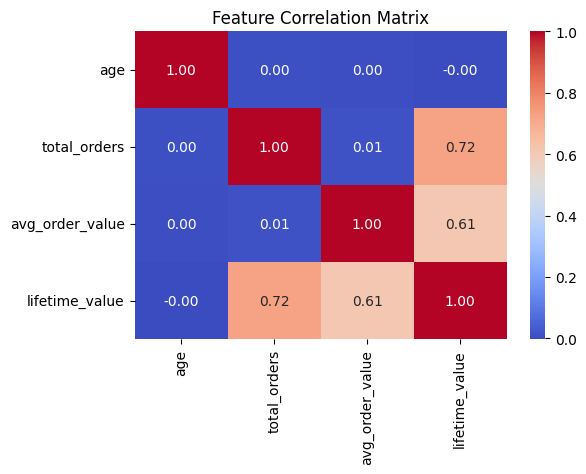

In [195]:
# Create correlation matrix
plt.figure(figsize=(6,4))
sns.heatmap(data_cluster.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [196]:
#Feature Importance Using Random Forest
#To determine which features are most important for segmentation, we can use Random Forest Feature Importance.

In [197]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Fit a model to check feature importance
rf = RandomForestRegressor()
rf.fit(data_scaled, data['lifetime_value'])  # Predicting LTV as a target example

# Extract feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': rf.feature_importances_})
print(feature_importance.sort_values(by="Importance", ascending=False))

           Feature    Importance
3   lifetime_value  9.999915e-01
2  avg_order_value  7.407404e-06
0              age  7.955530e-07
1     total_orders  2.988144e-07


In [198]:
feature_importance

,Feature,Importance
0,age,7.955530e-07
1,total_orders,2.988144e-07
2,avg_order_value,7.407404e-06
3,lifetime_value,9.999915e-01


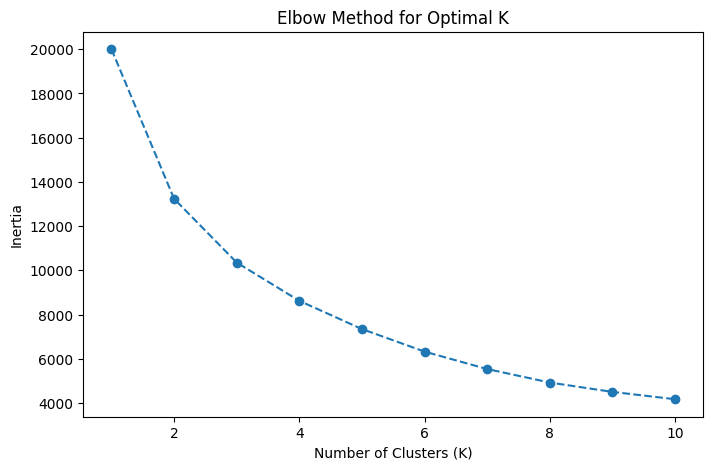

In [199]:
# Finding the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 11)  # Trying K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [200]:
# Applying K-Means with the chosen K
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
data['cluster'] = kmeans.fit_predict(data_scaled)

# Assign cluster labels to the original dataset
data_cluster['cluster'] = kmeans.labels_

# View the first few rows with cluster assignments
print(data_cluster.head())


   age  total_orders  avg_order_value  lifetime_value  cluster
0   23             4           210.30          841.20        3
1   41            12           270.97         3251.64        3
2   50             8           464.84         3718.72        1
3   66            15           266.24         3993.60        2
4   46            19            56.29         1069.51        2


In [201]:
#Analyzing Cluster Characteristics
#We analyze mean values per cluster to understand customer segments.


# Grouping by clusters to see the average values in each cluster
cluster_summary = data_cluster.groupby('cluster').mean()
print(cluster_summary)

               age  total_orders  avg_order_value  lifetime_value
cluster                                                          
0        42.717730     15.068085       382.181901     5692.891475
1        45.388477      4.706173       381.631284     1818.622239
2        57.183291     10.624041       162.753436     1717.833666
3        29.581531      8.755408       171.509459     1465.597105


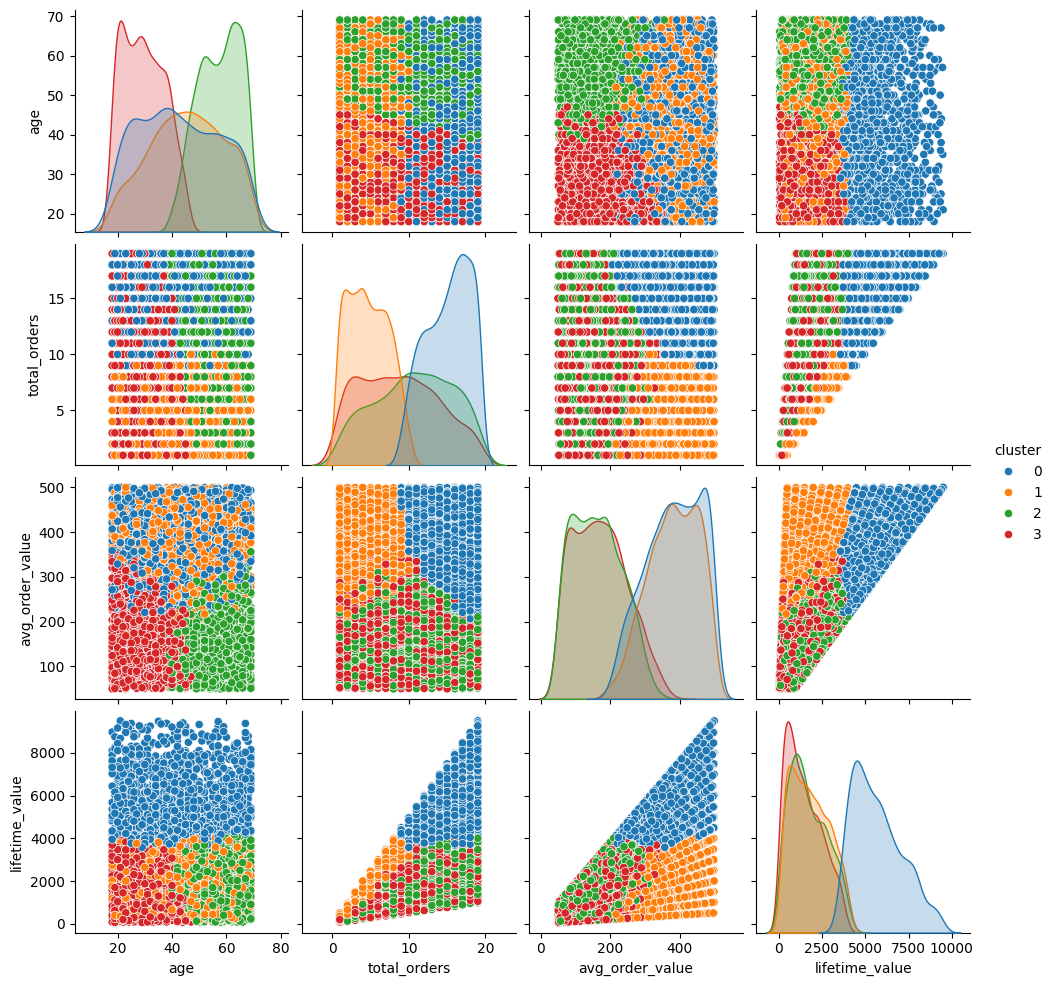

In [202]:
sns.pairplot(data_cluster, hue='cluster', palette='tab10')
plt.show()

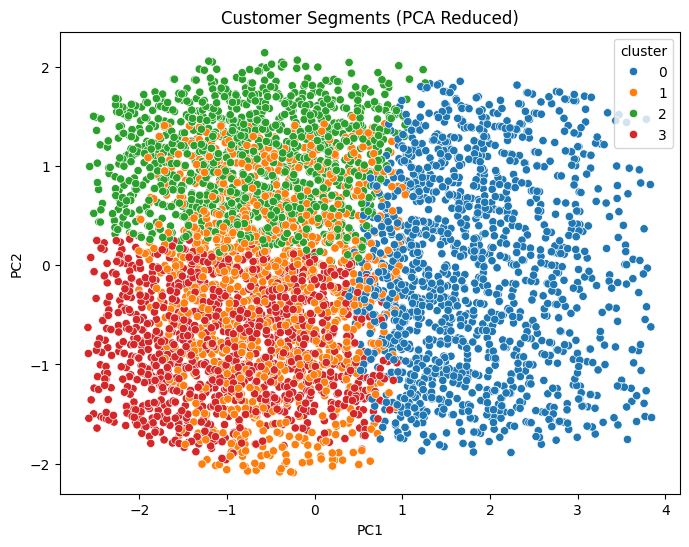

In [203]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(data_scaled)

# Create a DataFrame with PCA results
data_pca = pd.DataFrame(pca_transformed, columns=['PC1', 'PC2'])
data_pca['cluster'] = data['cluster']

# Scatter plot of clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=data_pca, palette='tab10')
plt.title("Customer Segments (PCA Reduced)")
plt.show()

In [204]:
Output: Customer Segments
#Each customer is now assigned a cluster (segment).
#We can analyze spending behavior, age distribution, and purchase frequency in each segment.

📊 Example Segments:

#Cluster 0: High spenders, frequent buyers, older customers
#Cluster 1: Low spenders, young customers, occasional buyers
#Cluster 2: Medium spenders, moderate frequency
#Cluster 3: New customers with high potential

SyntaxError: invalid character '📊' (U+1F4CA) (3776980743.py, line 5)